# 다중 클래스 분류

타겟 클래스가 2개 이상인 경우, Multi-Class Classification 문제라고 한다.
- 여러개의 Binary Class Classificatio 문제로 변환하여 해결한다.

## OvO (One-vs-One)
- K개의 타겟 클래스가 존재하는 경우,
- 이 중 2개의 클래스 조합을 선택하여  $K(K-1)2$개의 이진 클래스 분류 문제를 풀고
- 투표를 통해 가장 많은 표를 얻은 클래스 선택
- 실제로는 정규화된 판결 기준값 사용
    - but, 클래스가 많아질 경우, **시간이 매우 오래 걸린다.**
    
`OneVsOneClassifier` 클래스

## OvR (One-vs-the-Rest)
각각의 클래스에 대해 one이 나은지, 나머지가 나은지 체크
- 결국 binary 로 한 것(one-hot-encoding)과 같은 일을 한다.

`OneVsRestClassifier`클래스

In [1]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
model1 = LogisticRegression().fit(iris.data, iris.target)
model2 = OneVsRestClassifier(LogisticRegression()).fit(iris.data, iris.target)
model3 = OneVsOneClassifier(LogisticRegression()).fit(iris.data, iris.target)

#### LogisticRegression

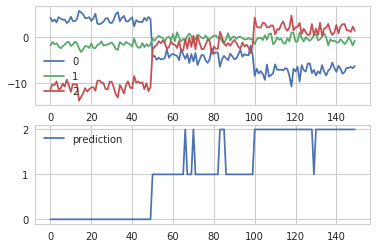

In [2]:
%matplotlib inline
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model1.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

#### OneVsRestClassifier
- Logistic과 같은 그림이다.

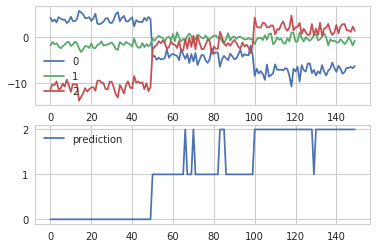

In [3]:
ax1 = plt.subplot(211)
pd.DataFrame(model2.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model2.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

#### OneVsOneClassifier
- 가장 정확하게 측정된듯

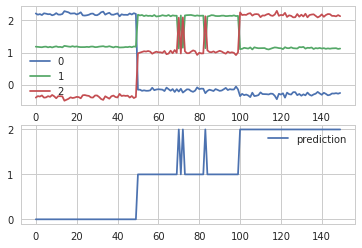

In [4]:
ax1 = plt.subplot(211)
pd.DataFrame(model3.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model3.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()


Label Binarizer (Encoding) 는 y 즉 종속변수의 클래스를 one-hot-encoding 하기 위한 명령이다. 
- 이렇게 하면 각 열은 OvR 문제를 풀기위한 y 값이 된다.